#**Nex-Gen-Ai-Healthcare**

## **Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Dependencies**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

## **Import Custom Dataset**

In [3]:
model_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NexGenAIHealthcare/modeltraining_df.csv')
sugg_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NexGenAIHealthcare/suggestion_df.csv')

## **Data Preprocessing**

In [4]:
model_df.columns

Index(['Unnamed: 0', 'Disease', 'Fever', 'Cough', 'Fatigue',
       'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure',
       'Cholesterol Level', 'Outcome Variable', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7',
       'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12',
       'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [5]:
model_df.drop(['Outcome Variable'], axis=1, inplace=True)

### **Dataset Overview**

In [6]:
model_df.head()

,Unnamed: 0,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,...,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,malaise,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain
1,1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,malaise,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain
2,2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,NaN
3,3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,NaN
4,4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,NaN


### **Dataset Basic Information**

In [7]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6960 non-null   int64 
 1   Disease               6960 non-null   object
 2   Fever                 6960 non-null   object
 3   Cough                 6960 non-null   object
 4   Fatigue               6960 non-null   object
 5   Difficulty Breathing  6960 non-null   object
 6   Age                   6960 non-null   int64 
 7   Gender                6960 non-null   object
 8   Blood Pressure        6960 non-null   object
 9   Cholesterol Level     6960 non-null   object
 10  Symptom_1             6960 non-null   object
 11  Symptom_2             6960 non-null   object
 12  Symptom_3             6960 non-null   object
 13  Symptom_4             6666 non-null   object
 14  Symptom_5             6120 non-null   object
 15  Symptom_6             5940 non-null   

### **Null Values in Dataset**

In [8]:
model_df.isnull().sum()

Unnamed: 0                 0
Disease                    0
Fever                      0
Cough                      0
Fatigue                    0
Difficulty Breathing       0
Age                        0
Gender                     0
Blood Pressure             0
Cholesterol Level          0
Symptom_1                  0
Symptom_2                  0
Symptom_3                  0
Symptom_4                294
Symptom_5                840
Symptom_6               1020
Symptom_7               1440
Symptom_8               1536
Symptom_9               2220
Symptom_10              2880
Symptom_11              3600
Symptom_12              4824
Symptom_13              5376
Symptom_14              5880
Symptom_15              5880
Symptom_16              6024
Symptom_17              6528
dtype: int64

### **Unique Values in each Colunm**

In [9]:
print('unique calues of colunms Disease :', model_df['Disease'].unique())
print('\n')
print('unique calues of colunms Fever :', model_df['Fever'].unique())
print('\n')
print('unique calues of colunms Cough :', model_df['Cough'].unique())
print('\n')
print('unique calues of colunms Fatigue:', model_df['Fatigue'].unique())
print('\n')
print('unique calues of colunms Difficulty Breathing:', model_df['Difficulty Breathing'].unique())
print('\n')
print('unique calues of colunms Gender:', model_df['Gender'].unique())
print('\n')
print('unique calues of colunms Blood Pressure:', model_df['Blood Pressure'].unique())
print('\n')
print('unique calues of colunms Cholesterol Level:', model_df['Cholesterol Level'].unique())
print('\n')
print('unique calues of colunms Symptom_1:', model_df['Symptom_1'].unique())
print('\n')
print('unique calues of colunms Symptom_2:', model_df['Symptom_2'].unique())

unique calues of colunms Disease : ['Common Cold' 'Hyperthyroidism' 'Gastroenteritis' 'Migraine' 'Pneumonia'
 'Psoriasis' 'Malaria' 'Acne' 'Hypoglycemia' 'Tuberculosis'
 'Hypothyroidism' 'Hepatitis B']


unique calues of colunms Fever : ['No' 'Yes']


unique calues of colunms Cough : ['Yes' 'No']


unique calues of colunms Fatigue: ['Yes' 'No']


unique calues of colunms Difficulty Breathing: ['No' 'Yes']


unique calues of colunms Gender: ['Female' 'Male']


unique calues of colunms Blood Pressure: ['Normal' 'Low' 'High']


unique calues of colunms Cholesterol Level: ['Normal' 'High' 'Low']


unique calues of colunms Symptom_1: [' continuous_sneezing' ' chills' ' fatigue' ' mood_swings' ' vomiting'
 ' sunken_eyes' ' acidity' ' indigestion' ' skin_rash' ' joint_pain'
 ' pus_filled_pimples' ' weight_gain' 'itching']


unique calues of colunms Symptom_2: [' chills' ' fatigue' ' mood_swings' ' weight_loss' ' sunken_eyes'
 ' dehydration' ' indigestion' ' headache' ' cough' ' joint_pain'
 '

### **Replace Null values with None**

In [10]:
model_df.replace(np.nan,'None', inplace=True)

In [11]:
model_df.isnull().sum()

Unnamed: 0              0
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Symptom_1               0
Symptom_2               0
Symptom_3               0
Symptom_4               0
Symptom_5               0
Symptom_6               0
Symptom_7               0
Symptom_8               0
Symptom_9               0
Symptom_10              0
Symptom_11              0
Symptom_12              0
Symptom_13              0
Symptom_14              0
Symptom_15              0
Symptom_16              0
Symptom_17              0
dtype: int64

In [12]:
model_df.shape

(6960, 27)

In [13]:
model_df.head()

,Unnamed: 0,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,...,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,malaise,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain
1,1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,malaise,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain
2,2,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,None
3,3,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,None
4,4,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,...,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,None


In [14]:
model_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### **Statistical Information**

In [15]:
# summary table function
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

In [16]:
summary(model_df).style.background_gradient(cmap='YlOrBr')

data shape: (6960, 26)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
Disease,object,0,0.000000,12,nan,nan,nan,nan,Common Cold,Common Cold,Common Cold
Fever,object,0,0.000000,2,nan,nan,nan,nan,No,No,No
Cough,object,0,0.000000,2,nan,nan,nan,nan,Yes,Yes,Yes
Fatigue,object,0,0.000000,2,nan,nan,nan,nan,Yes,Yes,Yes
Difficulty Breathing,object,0,0.000000,2,nan,nan,nan,nan,No,No,No
Age,int64,0,0.000000,18,25.000000,70.000000,40.793103,9.715171,25,25,25
Gender,object,0,0.000000,2,nan,nan,nan,nan,Female,Female,Female
Blood Pressure,object,0,0.000000,3,nan,nan,nan,nan,Normal,Normal,Normal
Cholesterol Level,object,0,0.000000,3,nan,nan,nan,nan,Normal,Normal,Normal
Symptom_1,object,0,0.000000,13,nan,nan,nan,nan,continuous_sneezing,continuous_sneezing,chills


## **Exploratory Data Analysis (EDA)**

### **Each Disease Count**

<ipython-input-17-6296481b4d98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=model_df["Disease"], palette="viridis")


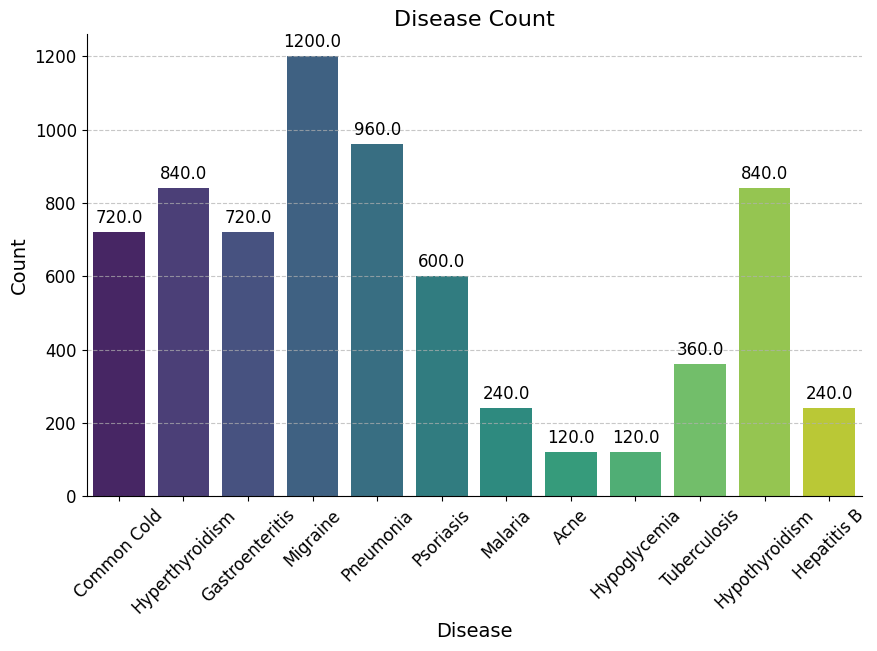

In [17]:
# Set the plot size
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=model_df["Disease"], palette="viridis")
plt.title("Disease Count", fontsize=16)
plt.xlabel("Disease", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **None Values Fequancy**

<ipython-input-18-ac027811f565>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=model_df["Symptom_17"], palette="viridis")


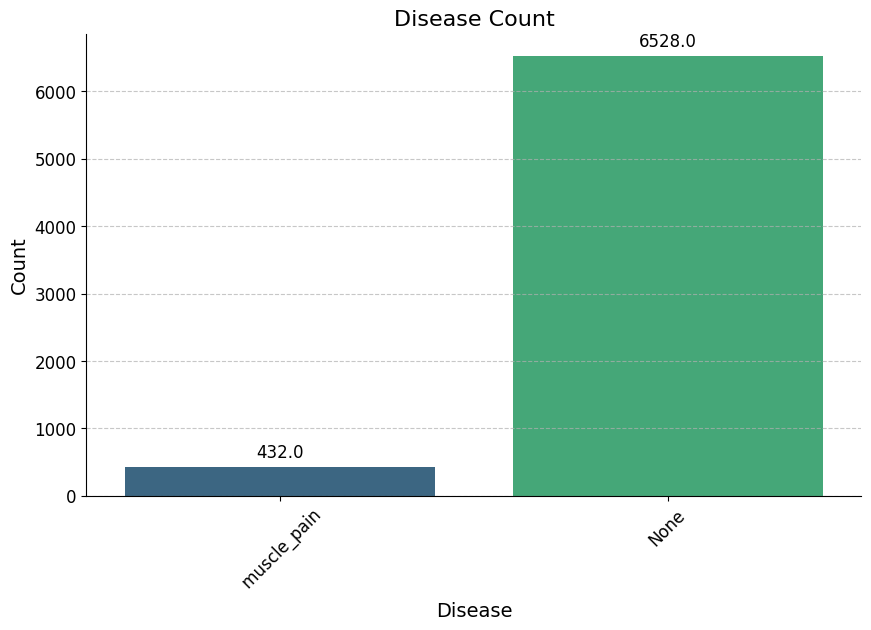

In [18]:
# Set the plot size
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=model_df["Symptom_17"], palette="viridis")
plt.title("Disease Count", fontsize=16)
plt.xlabel("Disease", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Count Plot for each Symptom**

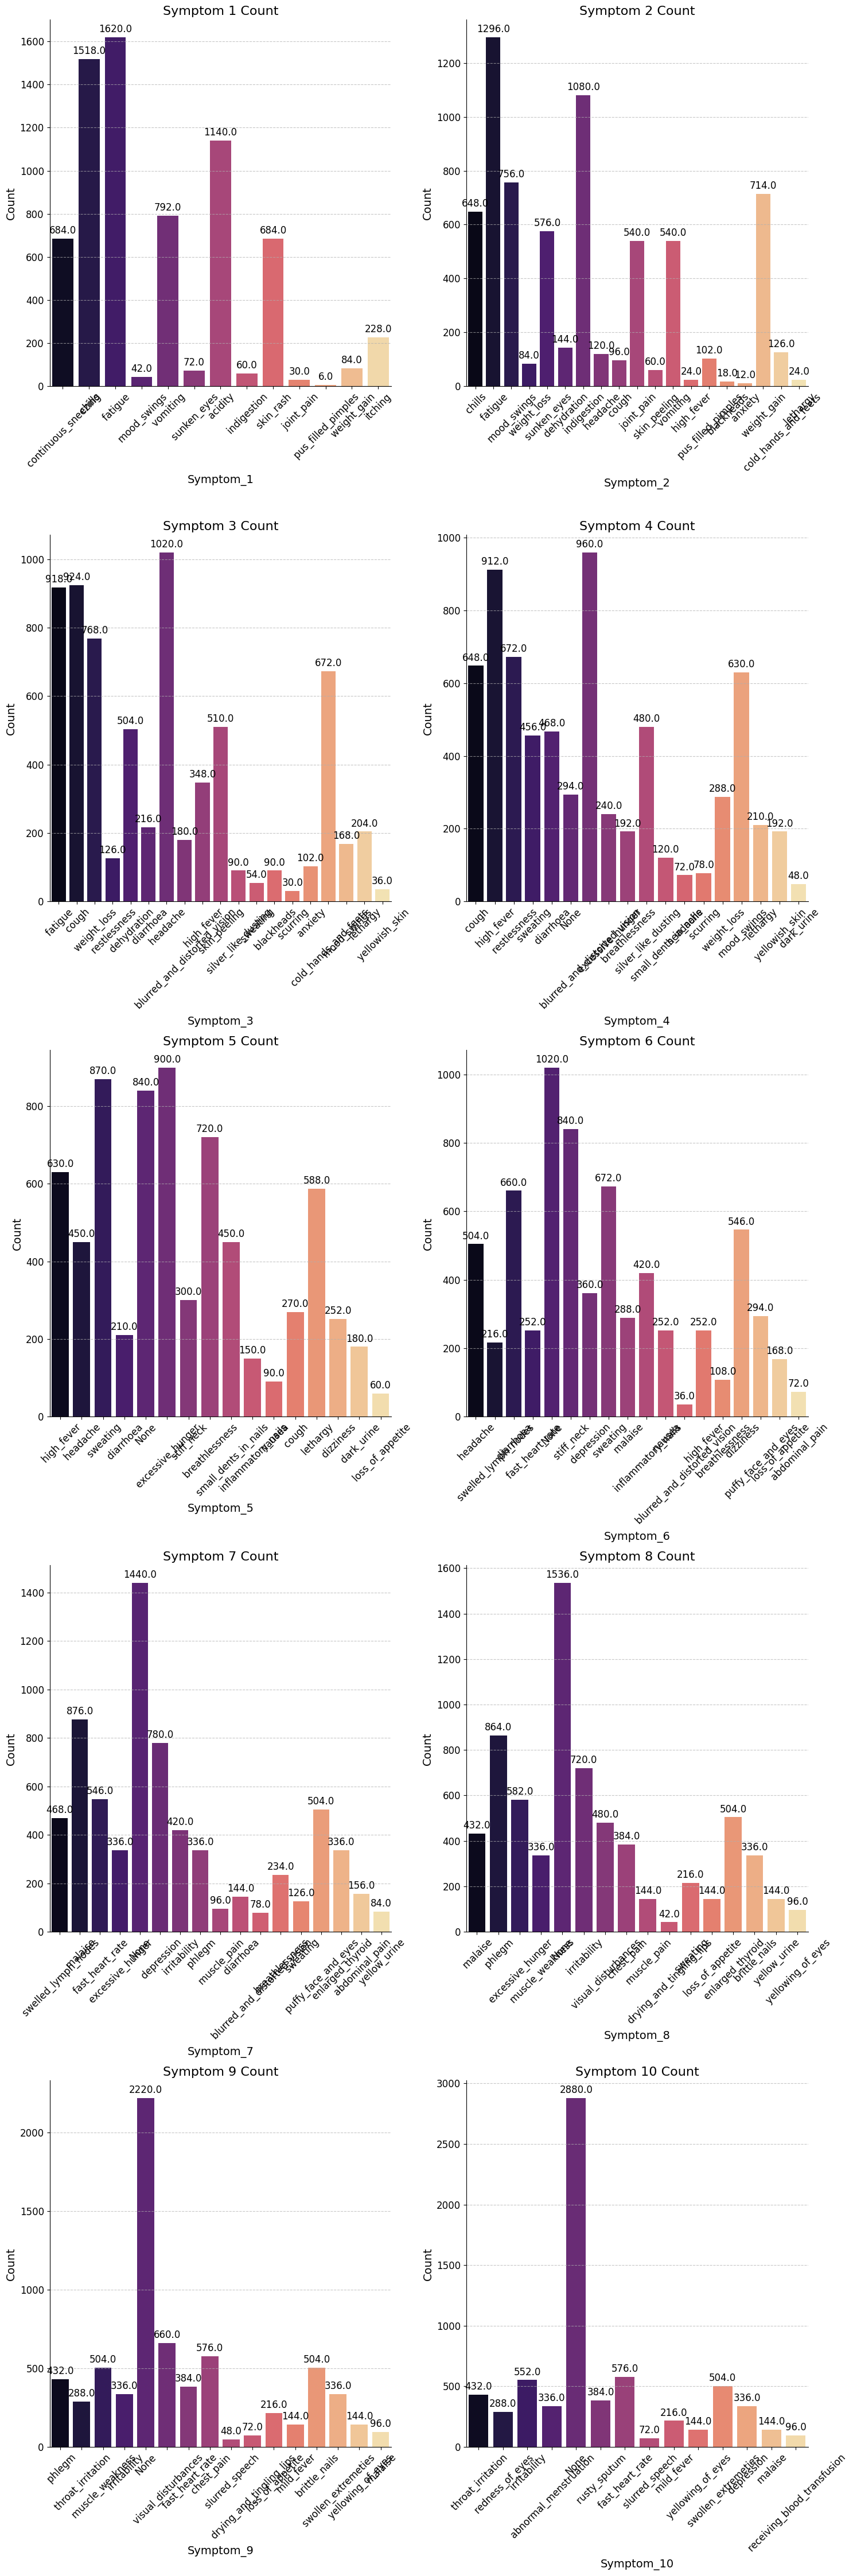

In [19]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 45))

# Custom function to create a count plot with customizations
def create_custom_countplot(ax, column, title):
    sns.countplot(x=model_df[column], hue=model_df[column], palette="magma", ax=ax, legend=False)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    sns.despine(ax=ax)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# List of symptom columns and their titles
symptoms = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10']
titles = ['Symptom 1 Count', 'Symptom 2 Count', 'Symptom 3 Count', 'Symptom 4 Count', 'Symptom 5 Count',
          'Symptom 6 Count', 'Symptom 7 Count', 'Symptom 8 Count', 'Symptom 9 Count', 'Symptom 10 Count']

# Create count plots for each symptom
for ax, symptom, title in zip(axes.flatten(), symptoms, titles):
    create_custom_countplot(ax, symptom, title)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### **Density plot for Age Distribution**

<ipython-input-20-1d37041e6ae0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model_df['Age'], shade=True, color='blue')


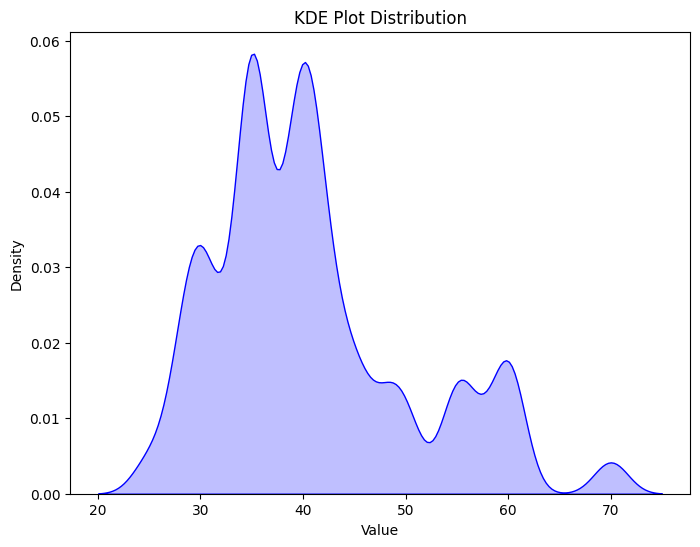

In [20]:
plt.figure(figsize=(8, 6))
sns.kdeplot(model_df['Age'], shade=True, color='blue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot Distribution')
plt.show()

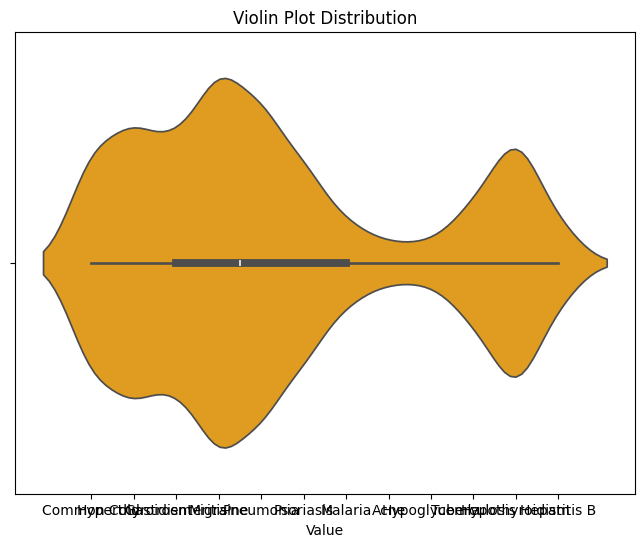

In [21]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=model_df['Disease'], color='orange')
plt.xlabel('Value')
plt.title('Violin Plot Distribution')
plt.show()

## **Data Pepration for Model Training**

### **Label Encoding**

In [22]:
final_df = model_df.copy()

In [23]:
object_col = []

for col in final_df.columns:
    if final_df[col].dtype == 'object':
        object_col.append(col)

In [24]:
le = LabelEncoder()
for col in object_col:
    final_df[col] = le.fit_transform(final_df[col])

In [25]:
final_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Symptom_1,...,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,0,1,1,0,25,0,2,2,2,...,7,9,11,6,6,4,1,1,1,0
1,1,0,1,1,0,25,0,2,2,2,...,7,9,11,6,6,4,1,1,1,0
2,1,0,1,1,0,25,0,2,2,1,...,10,12,7,8,5,1,0,2,2,1
3,1,0,1,1,0,25,0,2,2,2,...,10,12,7,8,5,1,0,2,2,1
4,1,0,1,1,0,25,0,2,2,2,...,10,12,7,8,5,1,0,2,2,1


### **Outlier Detection**

**No outliers Detected**

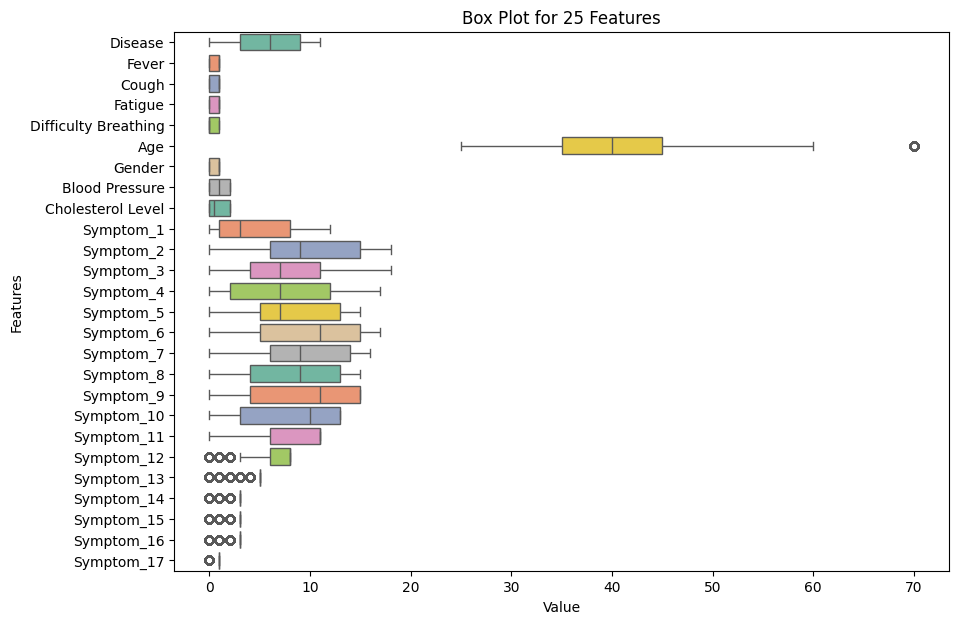

In [26]:
# Plotting box plots for 25 features
plt.figure(figsize=(10, 7))
sns.boxplot(data=final_df, orient='h', palette='Set2')
plt.title('Box Plot for 25 Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

## **Feature Engeneering**

### **Corelation Heatmap**

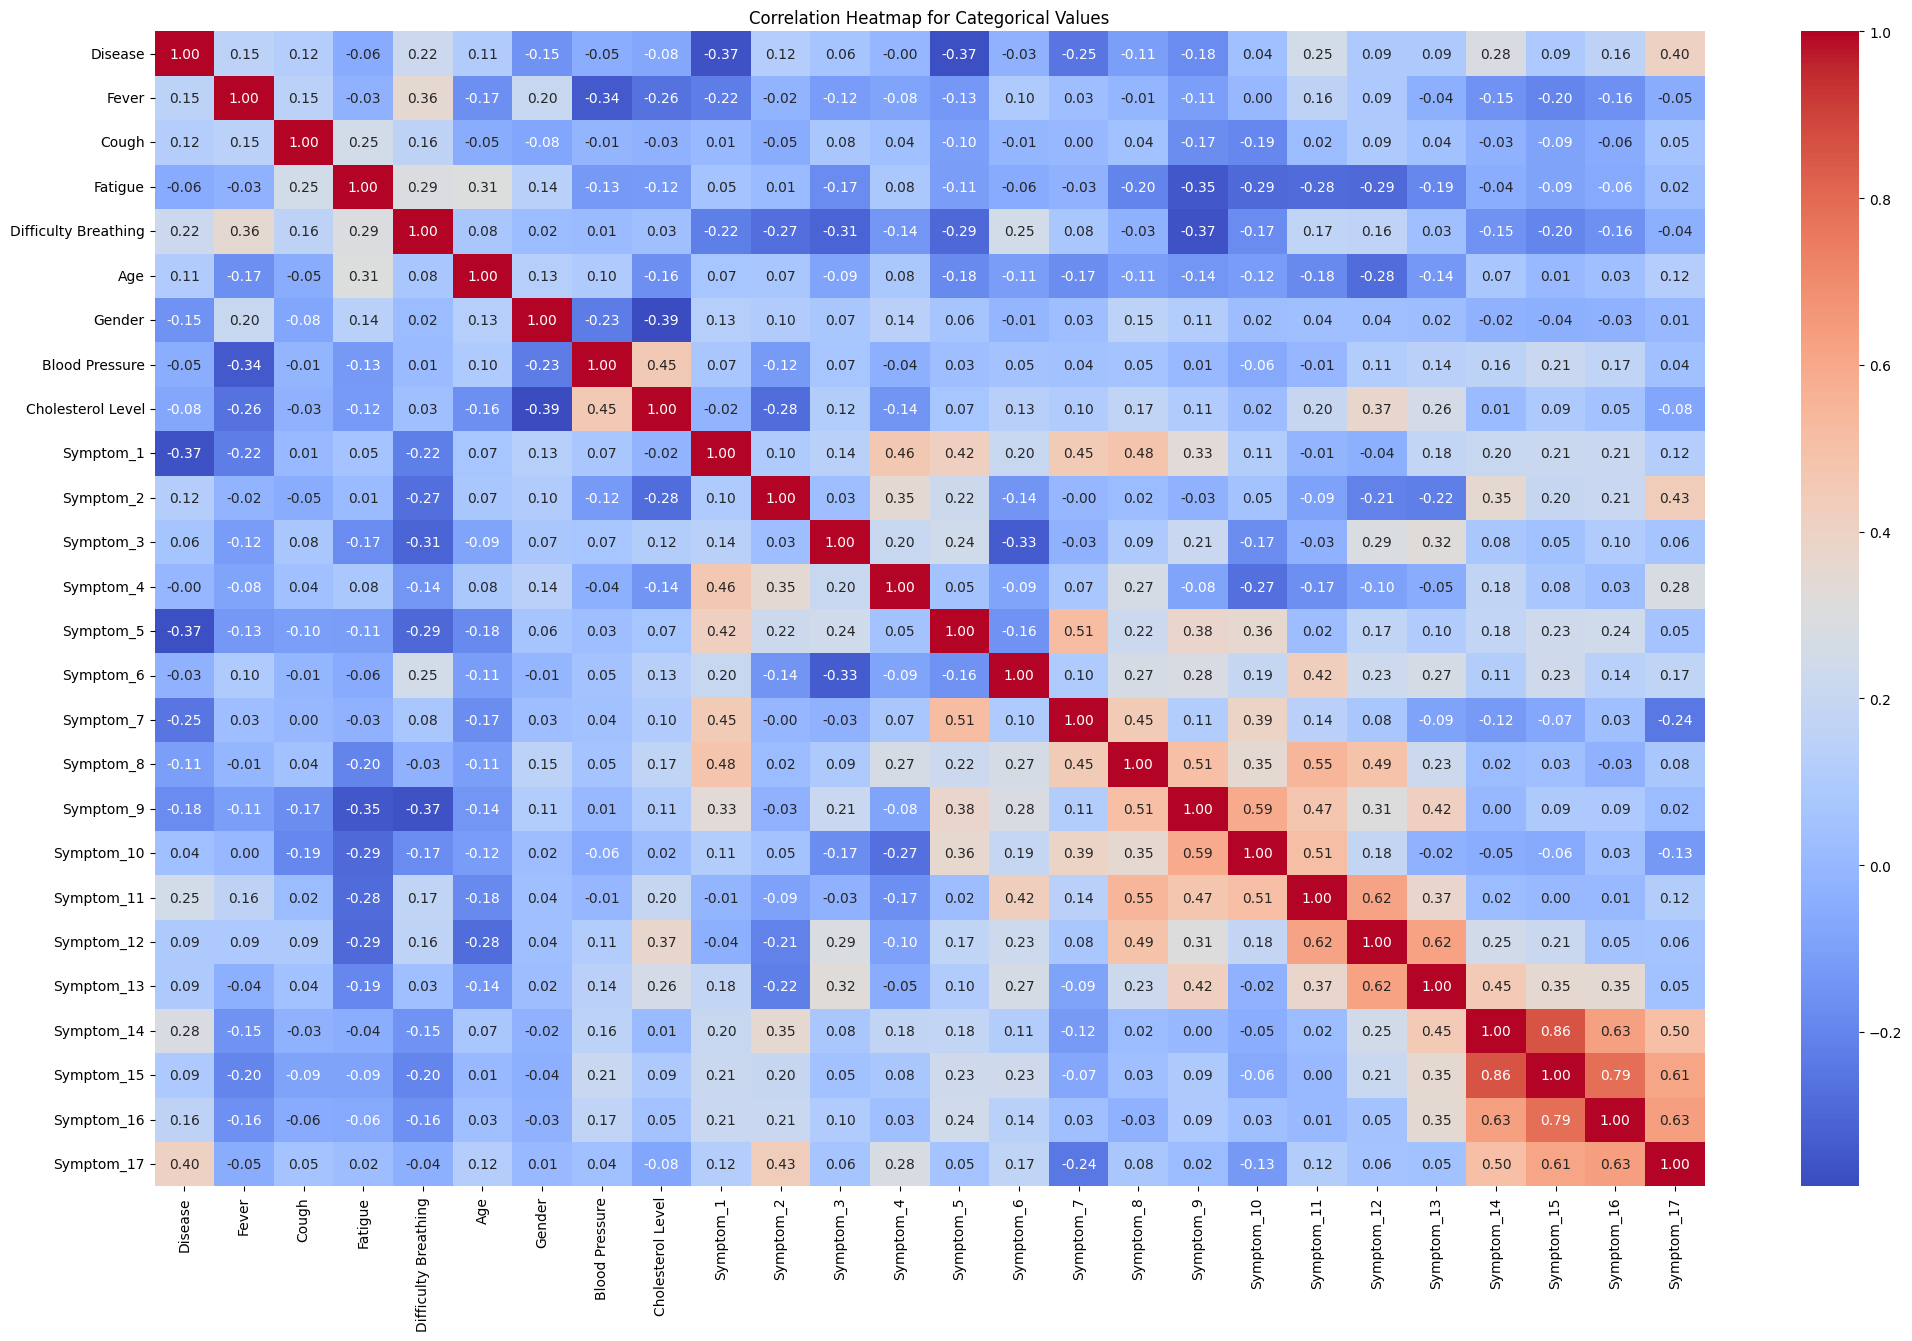

In [27]:
# Plot heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Categorical Values')
plt.show()

### **Droping Unneccesary Features**

In [28]:
drop_list = ['Symptom_14', 'Symptom_15', 'Symptom_16','Symptom_17']

final_df.drop(drop_list, axis=1, inplace=True)
final_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Symptom_1,...,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13
0,1,0,1,1,0,25,0,2,2,2,...,2,7,7,14,7,9,11,6,6,4
1,1,0,1,1,0,25,0,2,2,2,...,2,7,7,14,7,9,11,6,6,4
2,1,0,1,1,0,25,0,2,2,1,...,7,6,16,9,10,12,7,8,5,1
3,1,0,1,1,0,25,0,2,2,2,...,7,6,16,9,10,12,7,8,5,1
4,1,0,1,1,0,25,0,2,2,2,...,7,6,16,9,10,12,7,8,5,1


### **Train Test Split**

In [29]:
x = final_df.drop('Disease', axis=1)
y = final_df['Disease']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
print("The shape of xtrain: ", xtrain.shape)
print("The shape of xtest: " , xtest.shape)
print("The shape of ytrain: " , ytrain.shape)
print("The shape of ytest: " , ytest.shape)

The shape of xtrain:  (5568, 21)
The shape of xtest:  (1392, 21)
The shape of ytrain:  (5568,)
The shape of ytest:  (1392,)


## **Model Training**

### **Sapport Vector Machine (SVM)**

In [31]:
# Train SVM model
svm_model = SVC(kernel='linear', decision_function_shape='ovr')
svm_model.fit(xtrain, ytrain)

# Evaluate SVM model
y_pred = svm_model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [32]:
y_pred[0:5]

array([ 4, 11, 10,  1, 11])

### **RandomForest**

In [33]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(xtrain, ytrain)

# Predict and evaluate
y_pred = rf_model.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00       176
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       241
           9       1.00      1.00      1.00       184
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00        73

    accuracy                           1.00      1392
   macro avg       1.00      1.00      1.00      1392
weighted avg       1.00      1.00      1.00      1392



### **XG Boost**

In [34]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(xtrain, ytrain)

# Predict and evaluate
y_pred = xgb_model.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00       176
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       241
           9       1.00      1.00      1.00       184
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00        73

    accuracy                           1.00      1392
   macro avg       1.00      1.00      1.00      1392
weighted avg       1.00      1.00      1.00      1392



## **Hyperparameter Tuining**

### **XG Boost Hypertune**

In [41]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Grid search
xg_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
xg_grid_search.fit(xtrain, ytrain)

# Best parameters and model evaluation
print("Best parameters found: ", xg_grid_search.best_params_)
y_pred = xg_grid_search.predict(xtest)
print(classification_report(ytest, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00       176
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       241
           9       1.00      1.00      1.00       184
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00        73

    accuracy                           1.00      1392
   macro avg       1.00      1.00      1.00      1392
weighted avg       1.00      1.00      1.00      1392



## **Evaluation of Model**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00       176
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       241
           9       1.00      1.00      1.00       184
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00        73

    accuracy                           1.00      1392
   macro avg       1.00      1.00      1.00      1392
weighted avg       1.00      1.00      1.00      1392



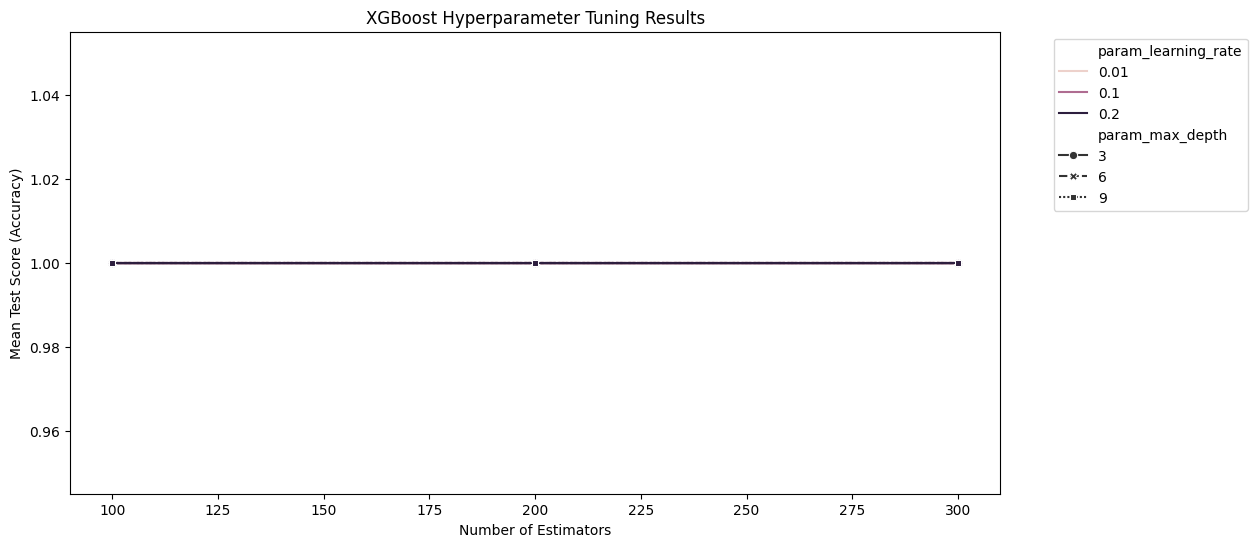

In [42]:
# Save the model
joblib.dump(xg_grid_search.best_estimator_, '/content/drive/MyDrive/Colab Notebooks/NexGenAIHealthcare/xgboost_model.pkl')

# Load the model
loaded_xgb_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/NexGenAIHealthcare/xgboost_model.pkl')
y_pred_loaded = loaded_xgb_model.predict(xtest)
print(classification_report(ytest, y_pred_loaded))

# Plot the accuracy results from the grid search
results = pd.DataFrame(xg_grid_search.cv_results_)
plt.figure(figsize=(12, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_learning_rate',
             style='param_max_depth', markers=True, data=results)
plt.title('XGBoost Hyperparameter Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Accuracy)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Hyperparameter Tuining**

### **Random Forest Hypertun**

In [36]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

# Best parameters and model evaluation
print("Best parameters found: ", grid_search.best_params_)
y_pred = grid_search.predict(xtest)
print(classification_report(ytest, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00       176
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00       167
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00       241
           9       1.00      1.00      1.00       184
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00        73

    accuracy                           1.00      1392
   macro avg       1.00      1.00      1.00     

## **Save Model**

In [ ]:
# Save the model
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/Colab Notebooks/NexGenAIHealthcare/random_forest_model.pkl')